In [1]:
from Binaries import *

Hardware = HardwareClassifier()
Hardware.load_and_print_performance("full_random_traces_downsampled_vem_1.000")

print()

for model in os.listdir("/cr/data01/filip/models/"):
    if model in ["ENSEMBLES", "NaiveBayesClassifier", "HardwareClassifier"]: continue       # these aren't trainable
    elif "Normed" in model: continue                                                        # normed layers don't work
    elif "LargeNetwork" in model: continue                                                  # large network smears predictions to random choice

    dataset = "validation_data" if model.split("_")[2] == "FullBandwidth" else "all_energies"
    if dataset == "validation_data" and model.split("_")[-1] != "NoCuts": dataset += "_no_cuts"
    _ = NNClassifier(model, supress_print = True).load_and_print_performance(dataset)


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            full_random_traces_downsampled...    176394       0       0 1827324 -> ACC =   8.80%

120_TwoLayer_FullBandwidth_NoCuts             validation_data                       83858       0       0   17609 -> ACC =  82.65%
120_OneLargeLayer_HighEnergy_1Muon            all_energies                         280183       0       0 1614532 -> ACC =  14.79%
120_LSTM_HighEnergy_NoCuts                    all_energies                          49348       0       0   14168 -> ACC =  77.69%
120_OneLayer_FullBandwidth_NoCuts             validation_data                       99079       0       0   27429 -> ACC =  78.32%
120_OneLayer_FullBandwidth_1Particle          validation_data_no_cuts               96381       0       0  181283 -> ACC =  34.71%
120_OneLayer_FullBandwidth_2VEM               validation_data_no_cuts               39679       0 


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            full_random_traces_downsampled...    233924       0       0 1933077 -> ACC =  10.79%


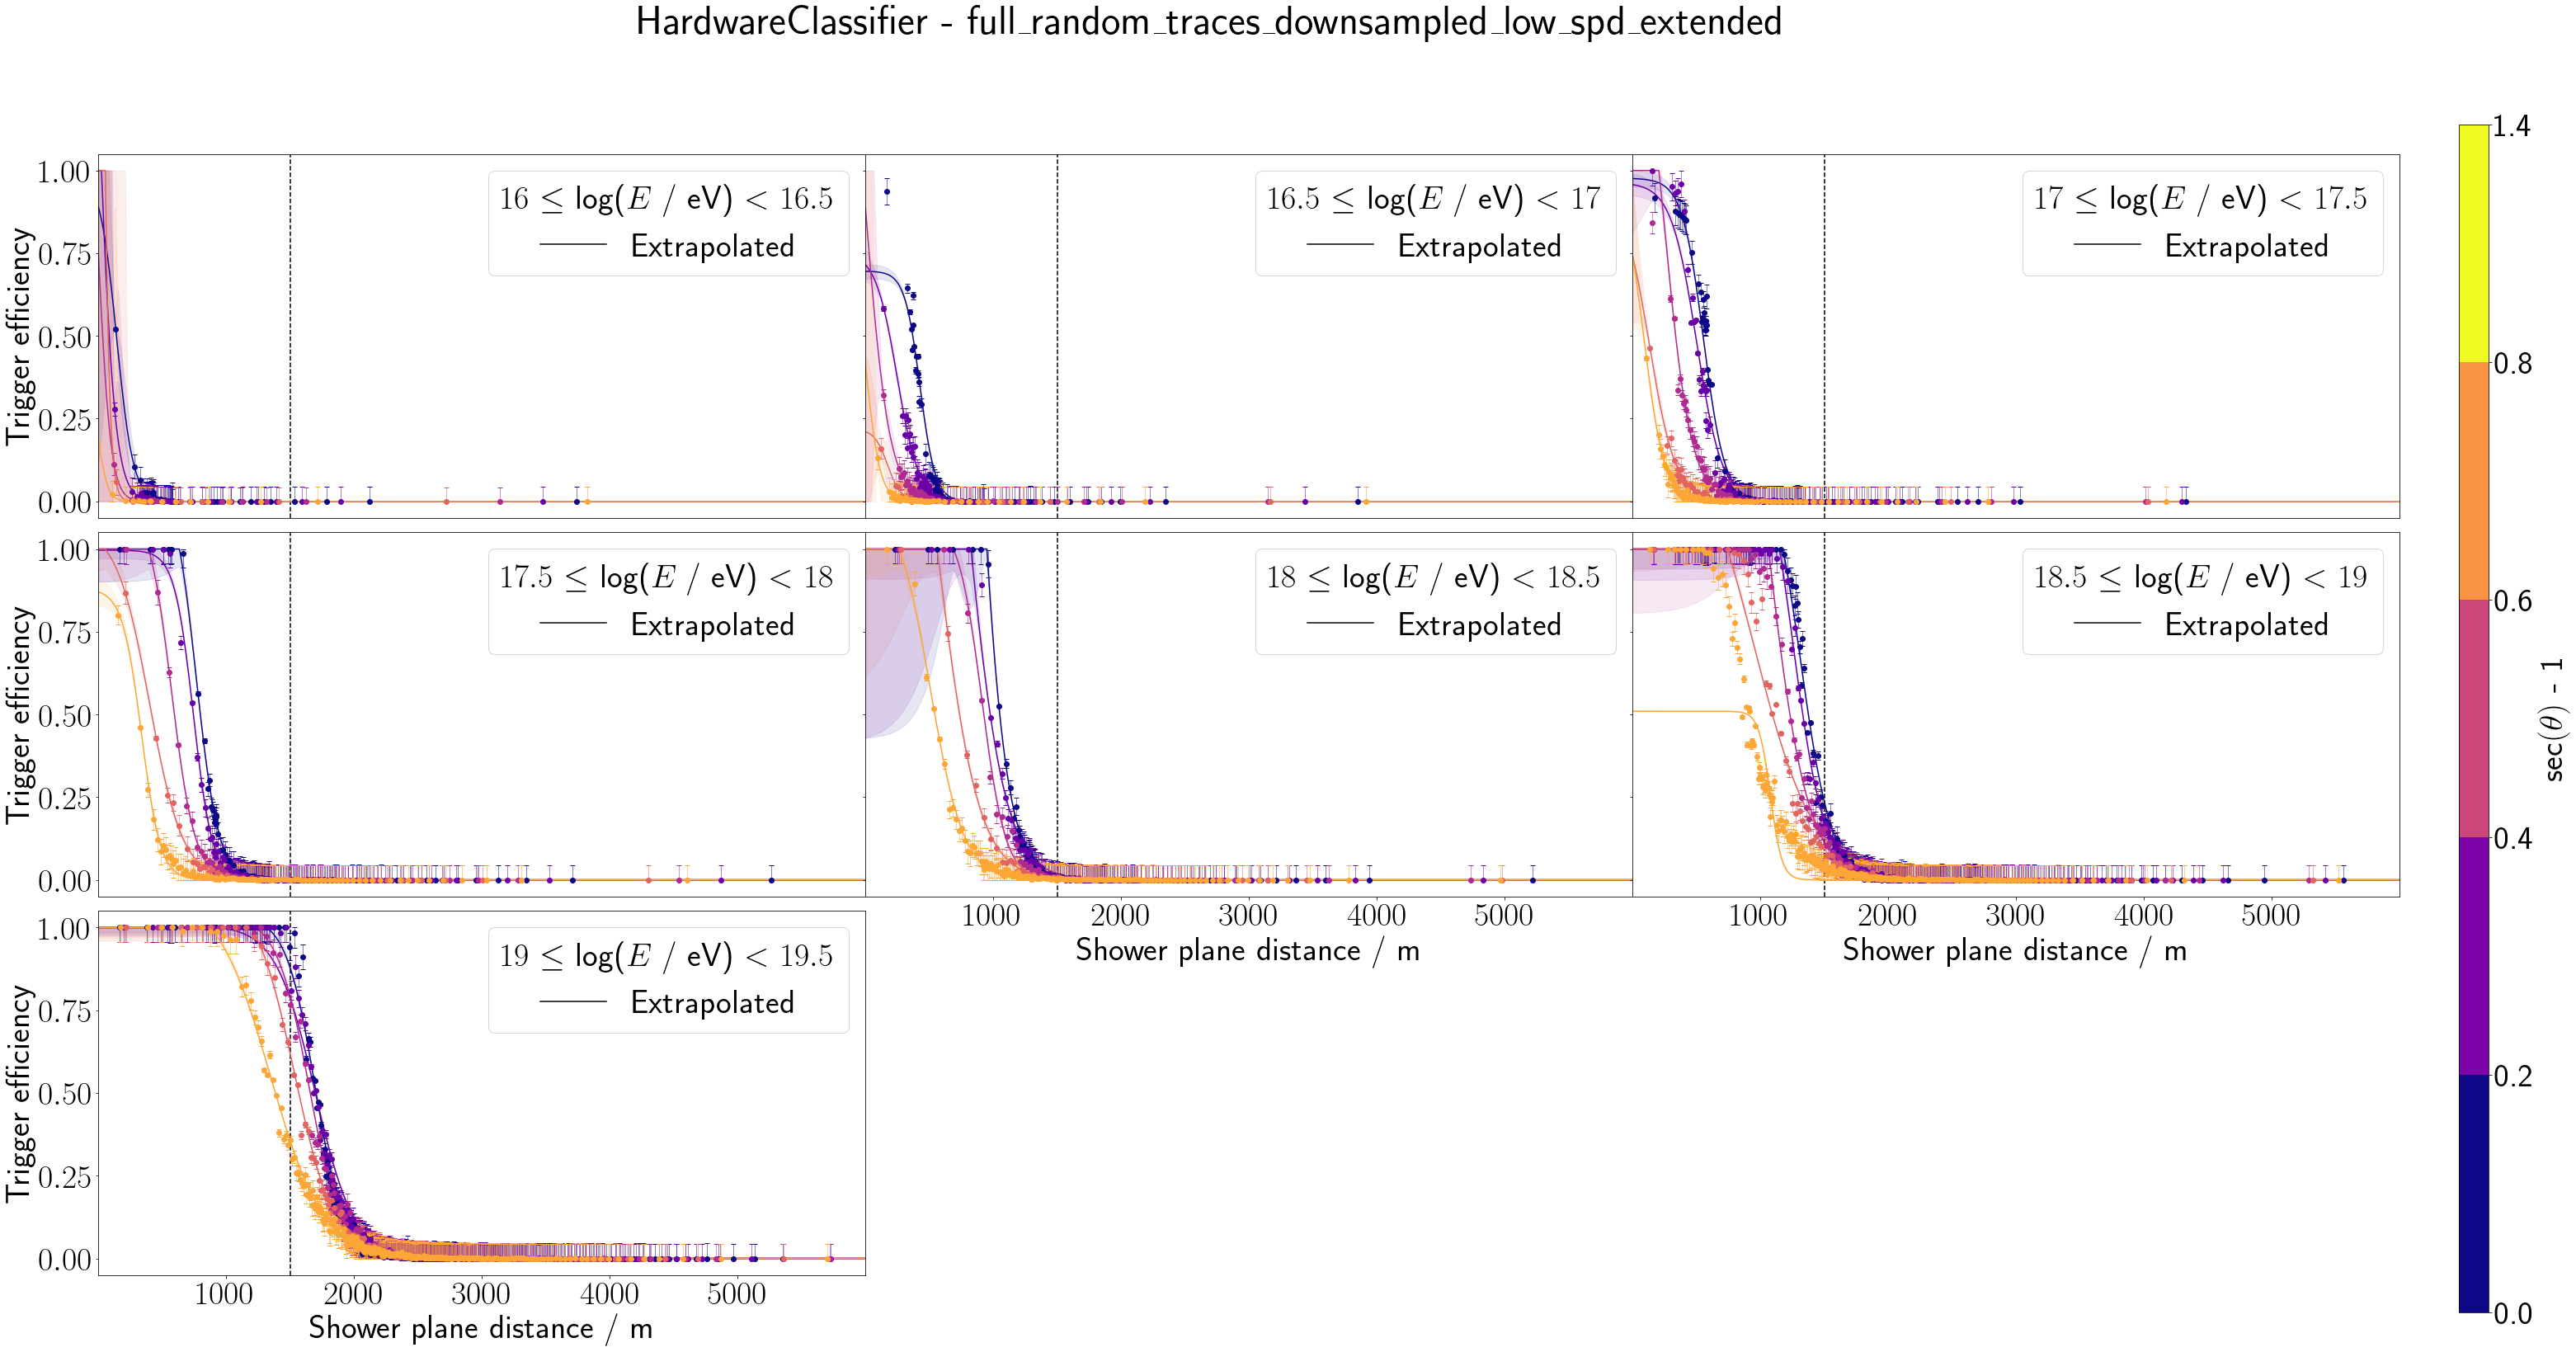

In [1]:
from Binaries import *

Hardware = HardwareClassifier()
Hardware.spd_energy_efficiency("full_random_traces_downsampled_low_spd_extended")


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            ToT_corrected                         89095       0       0  890054 -> ACC =   9.10%


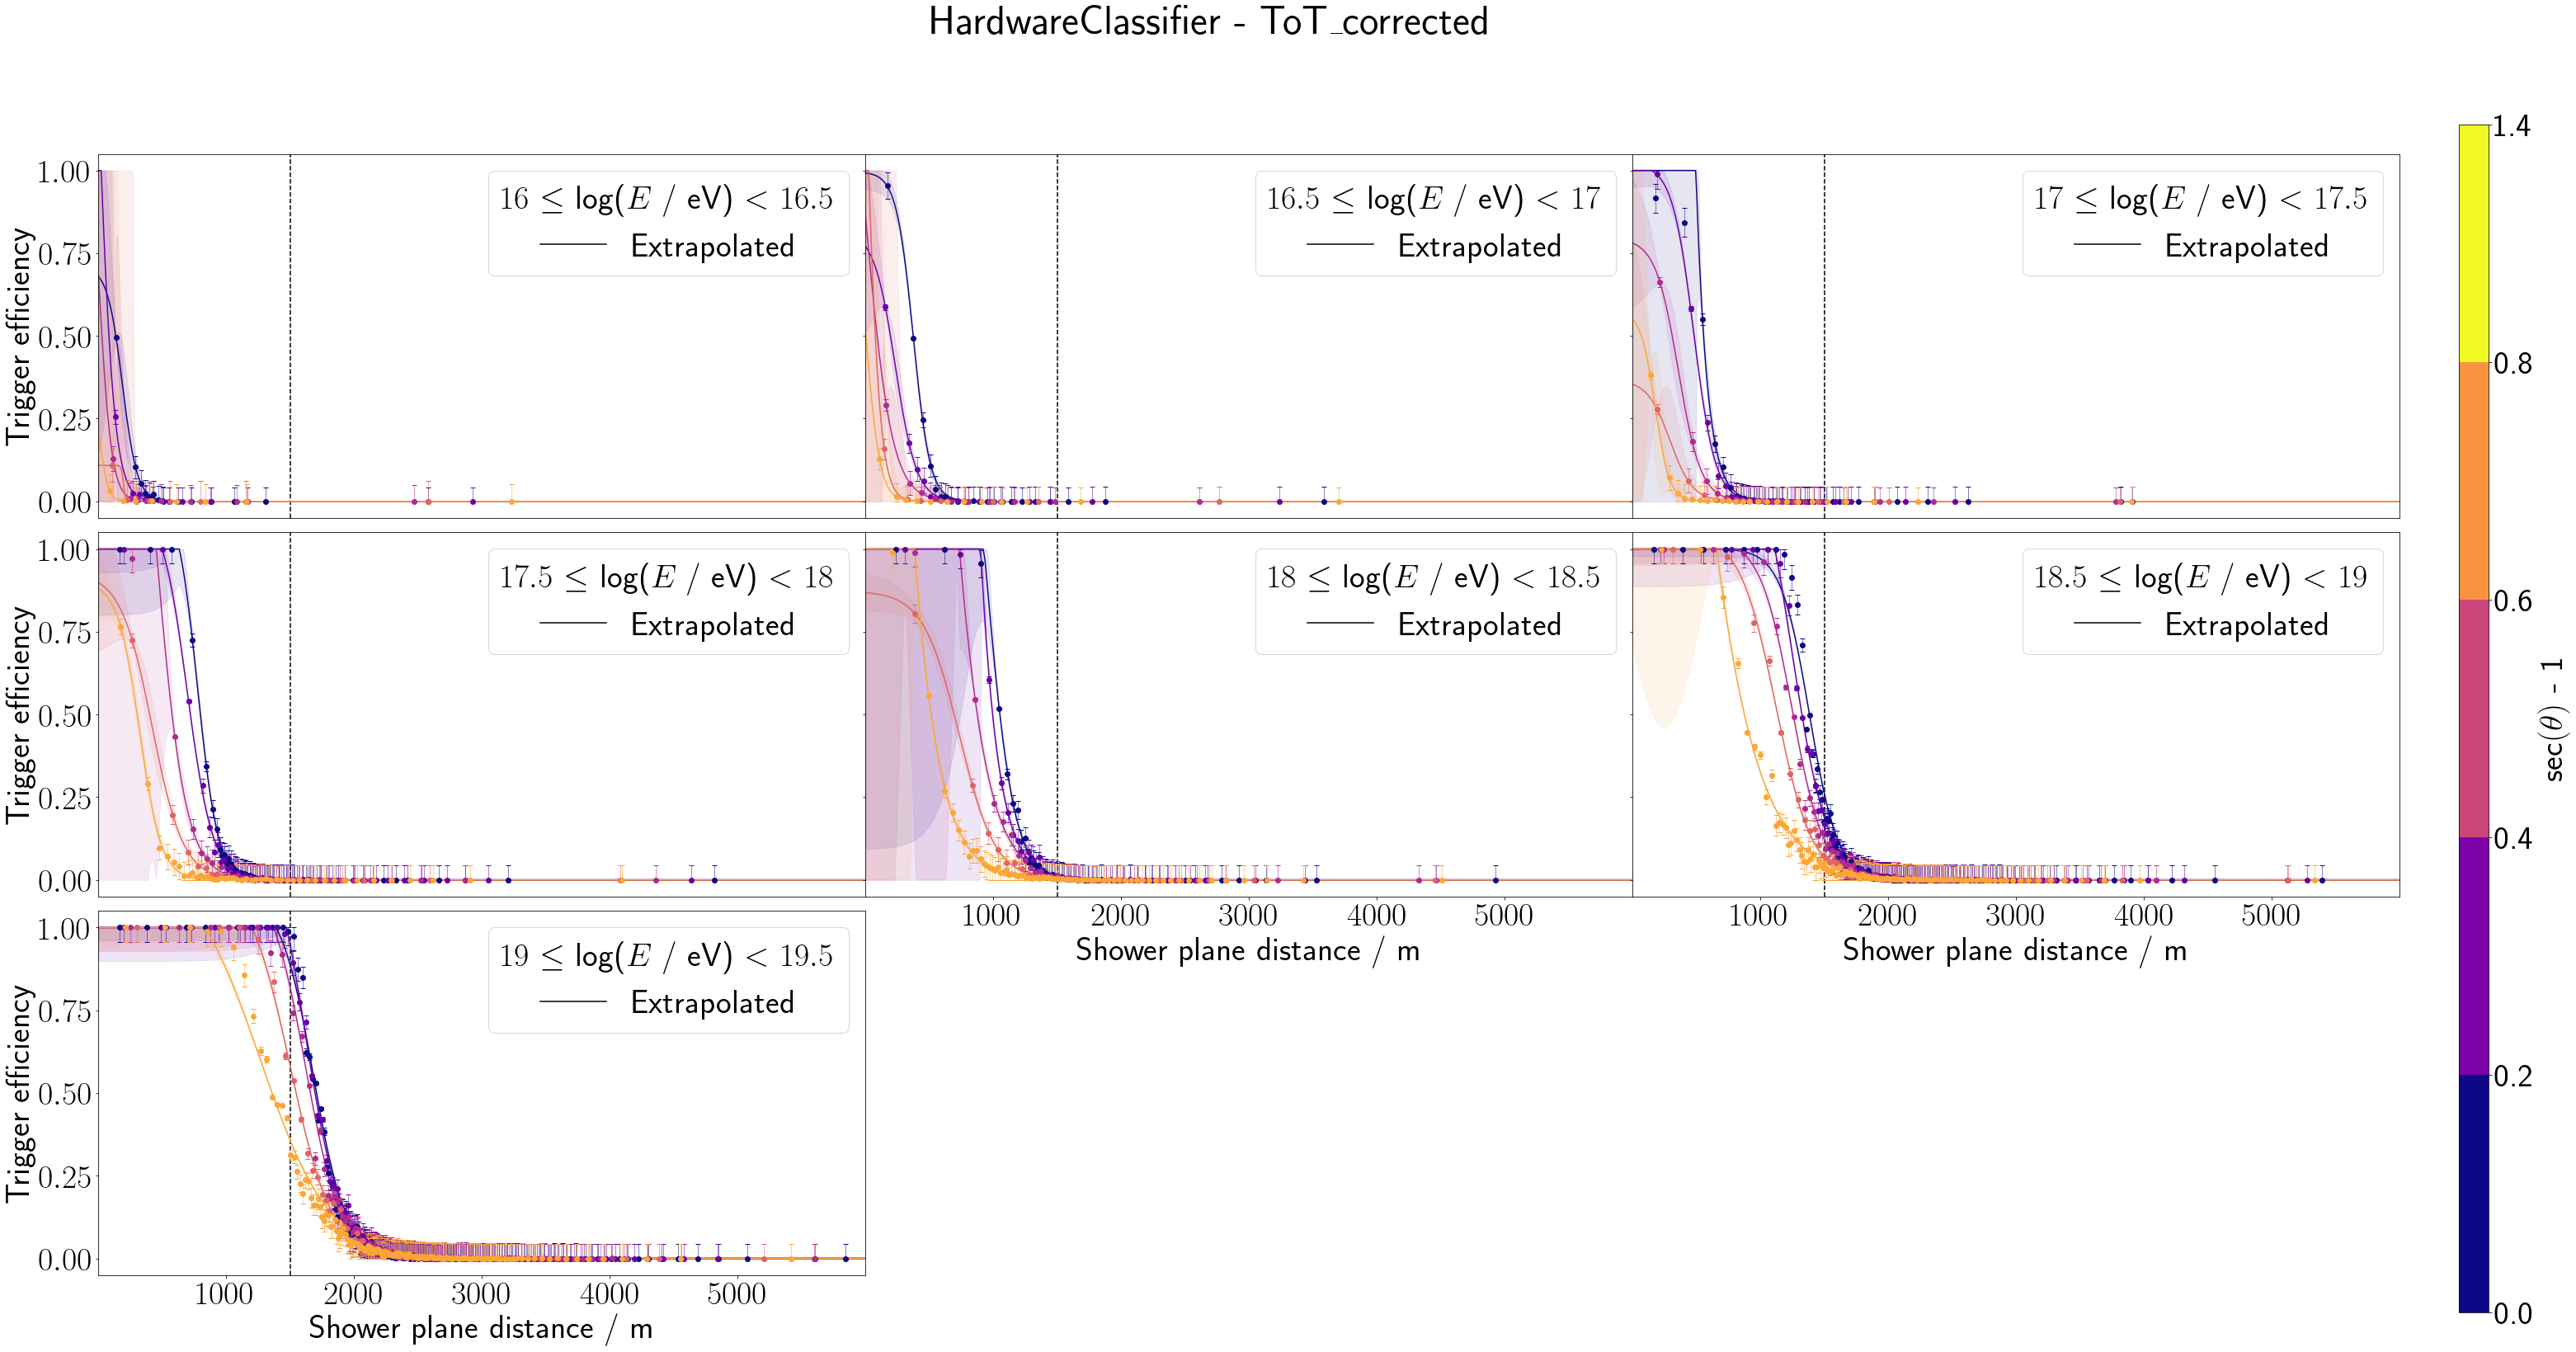

In [1]:
from Binaries import *

Hardware = HardwareClassifier()
Hardware.spd_energy_efficiency("ToT_corrected")

In [2]:
from Binaries import *

NN = NNClassifier("120_TwoLayer_FullBandwidth_NoCuts")
Events = EventGenerator(NN, split = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 40, 4)          40        
                                                                 
 conv1d (Conv1D)             (None, 1, 20, 2)          18        
                                                                 
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________

[INFO] -- LOADING NURIA: randoms0275.csv                                                            


In [7]:
print(len(Events.files))

for file in Events.files:

    if not file.endswith("_00.csv"):
        j = Events.find(file)
        _ = Events.files.pop(j)
        print("Removed", _)

print(len(Events.files))

6382
6382


In [8]:
NN.make_signal_dataset()
NN.make_signal_dataset(Events, "validation_data_per_trace_correction")

[INFO] -- LOADING NURIA: randoms0391.csv                                                            
[INFO] -- LOADING NURIA: randoms0572.csv                                                            
[INFO] -- LOADING NURIA: randoms0083.csv                                                            
[INFO] -- LOADING NURIA: randoms0348.csv                                                            
[INFO] -- LOADING NURIA: randoms0327.csv                                                            
[INFO] -- LOADING NURIA: randoms0640.csv                                                            
[INFO] -- LOADING NURIA: randoms0318.csv                                                            
[INFO] -- LOADING NURIA: randoms0278.csv                                                            
[INFO] -- LOADING NURIA: randoms0303.csv                                                            
Step 6382/6382 | 00:09:22 elapsed ||--------------------|| 100% -- 88.141 ms/step, ETA: 00:


Classifier                                    Dataset                                  TP      FP      TN      FN
120_TwoLayer_FullBandwidth_NoCuts             validation_data                       83858       0       0   17609 -> ACC =  82.65%
120_TwoLayer_FullBandwidth_NoCuts             validation_data_per_trace_corr...     48477       0       0       5 -> ACC =  99.99%


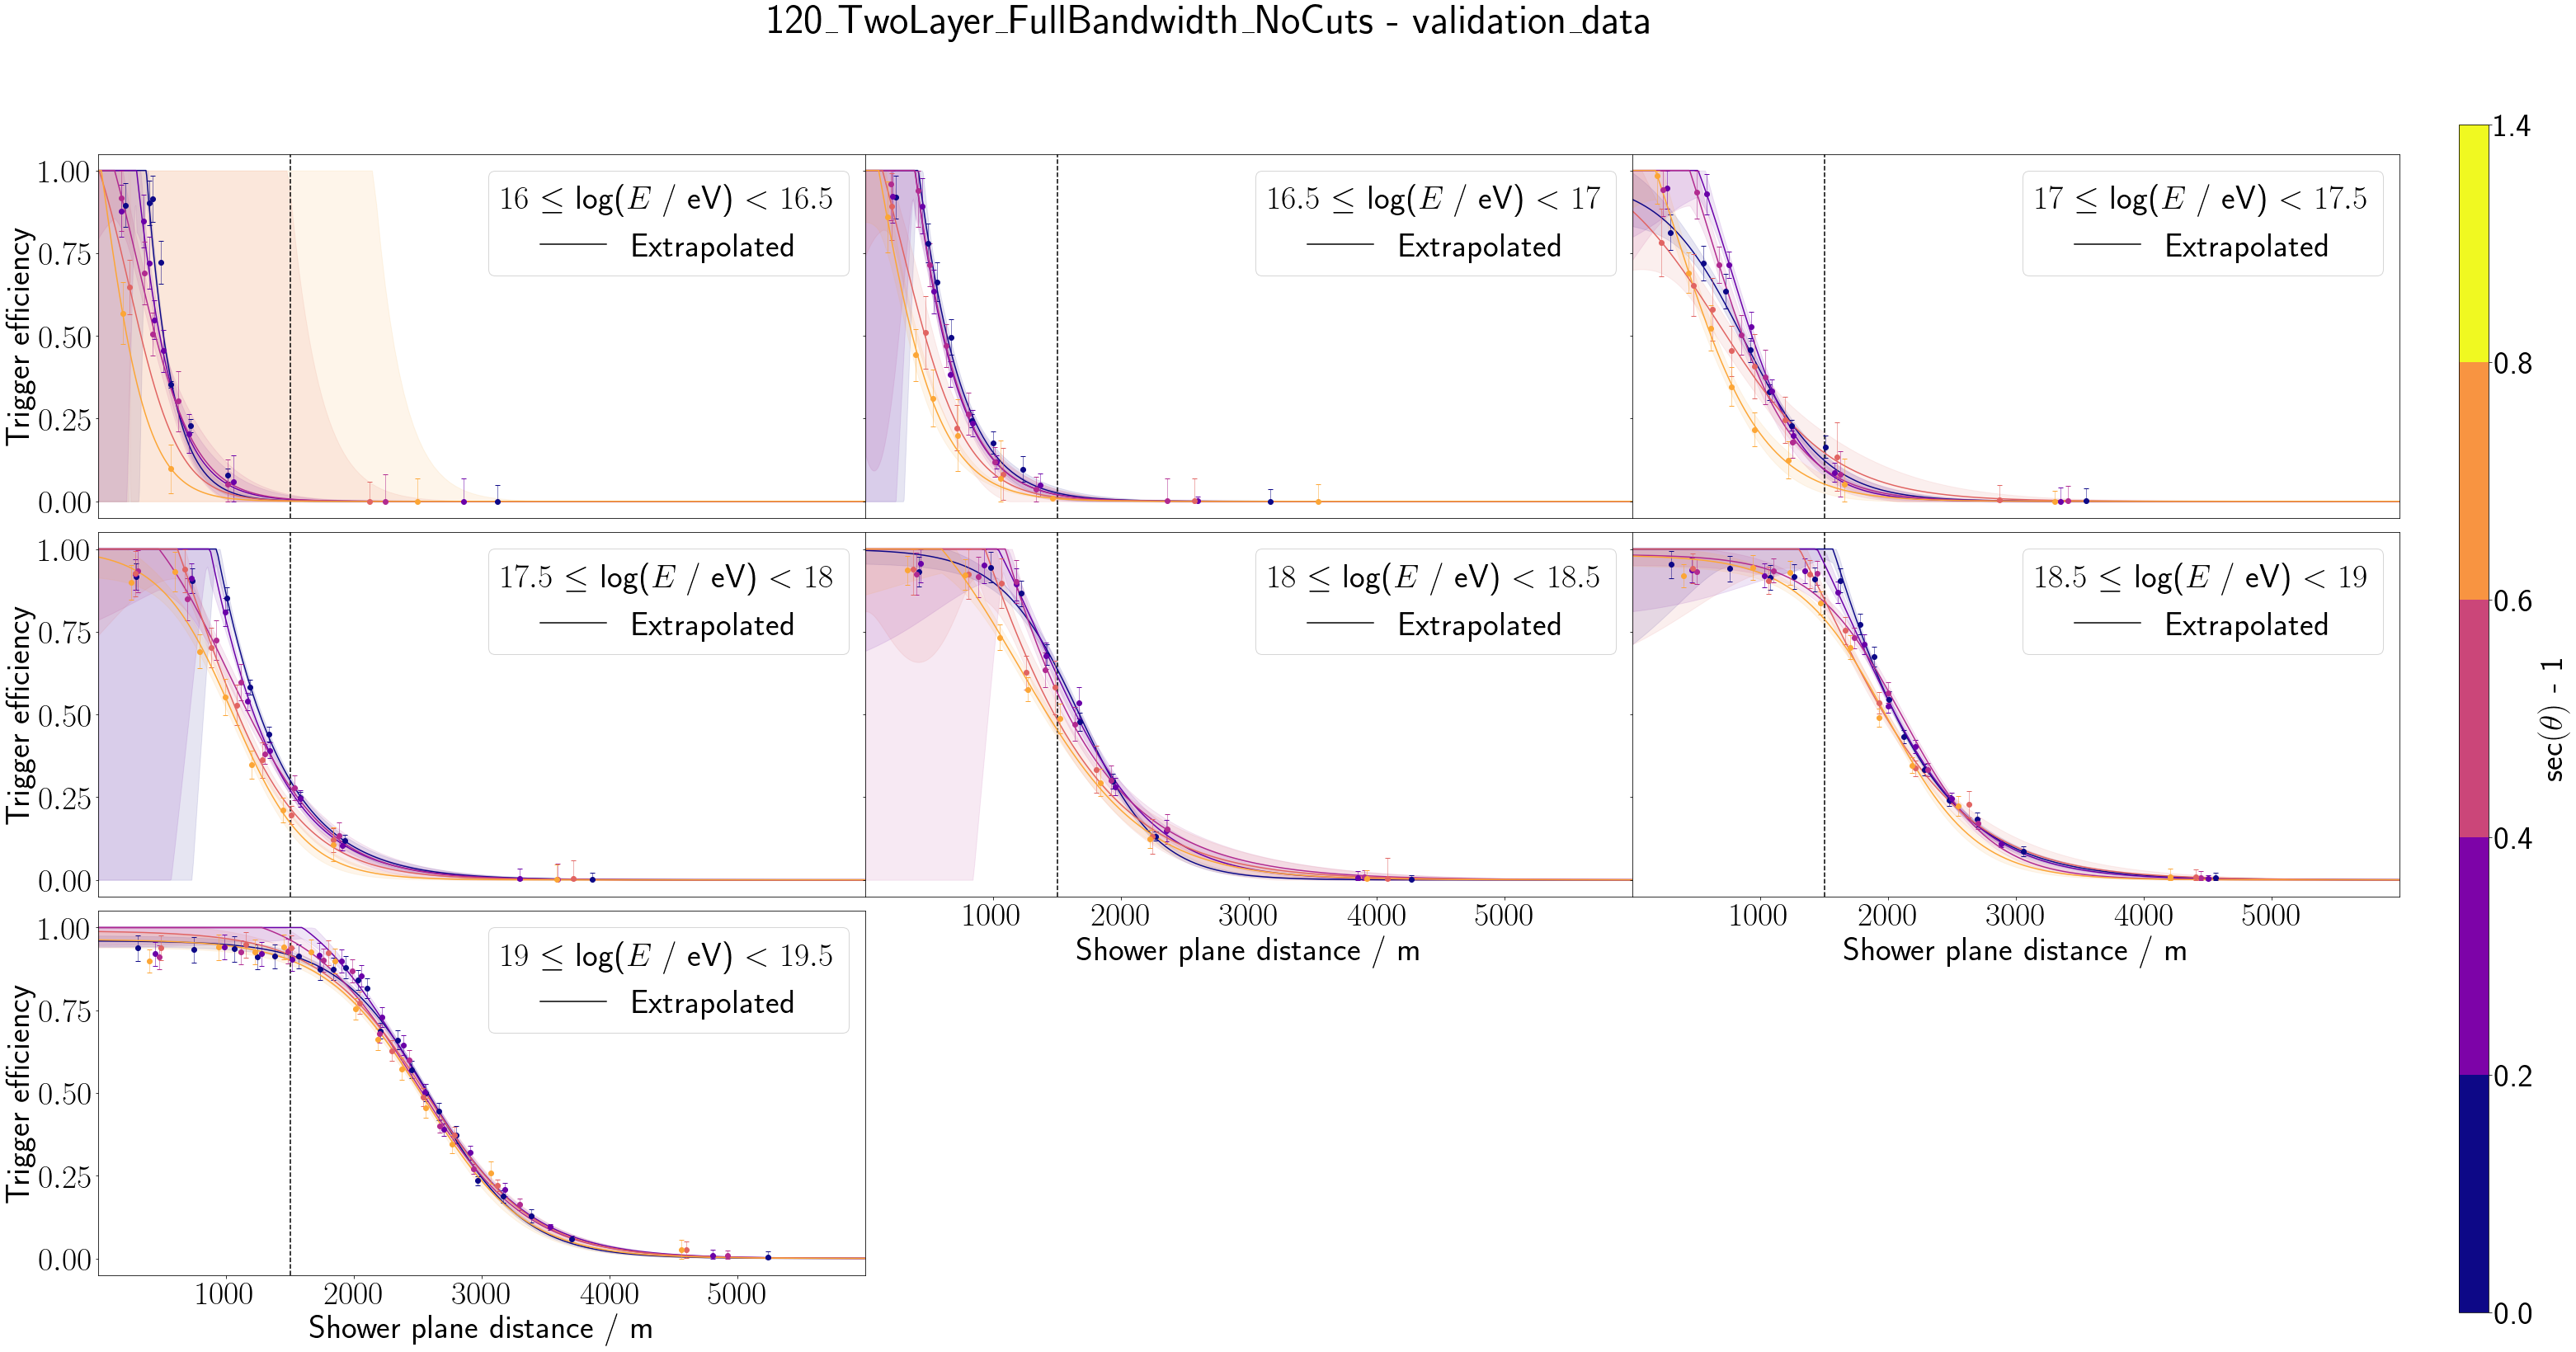

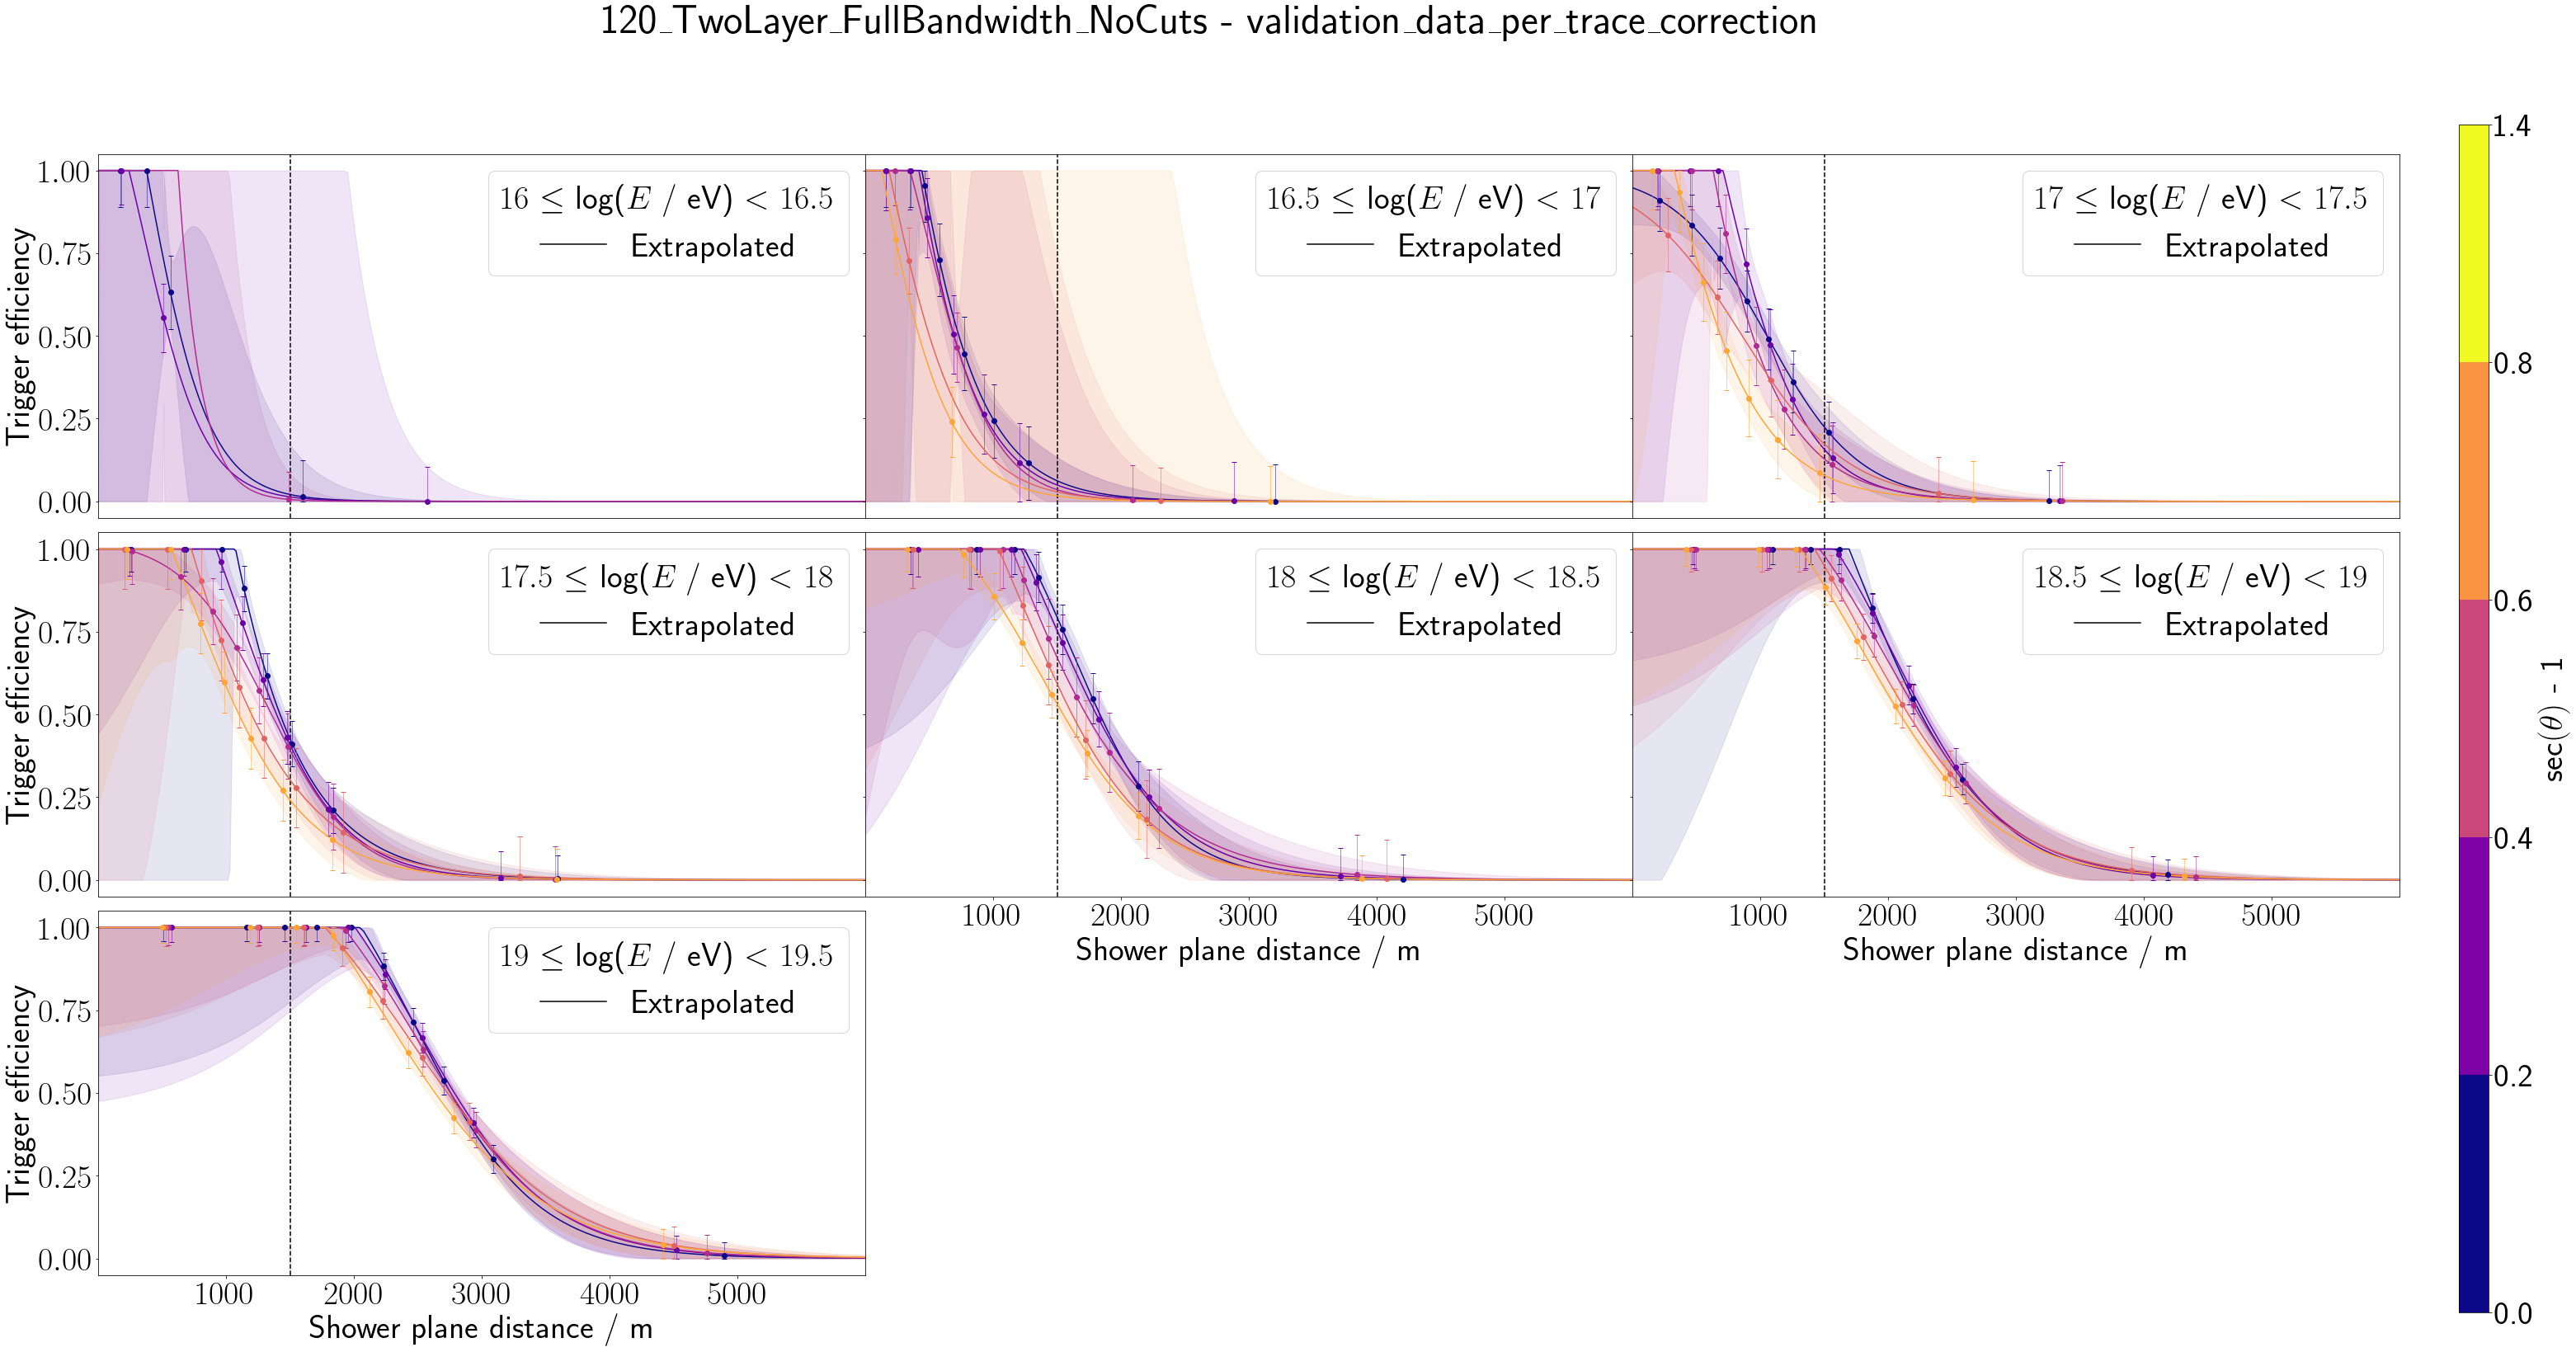

In [3]:
NN.spd_energy_efficiency("validation_data")
NN.spd_energy_efficiency("validation_data_per_trace_correction")